In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("churn.csv")

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

we don't have any null values in it

In [6]:
len(data[data.duplicated()])

0

THERE IS NO DUPLICATED ROWS PRESENT IN IT

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [8]:
import warnings
warnings.filterwarnings("ignore")

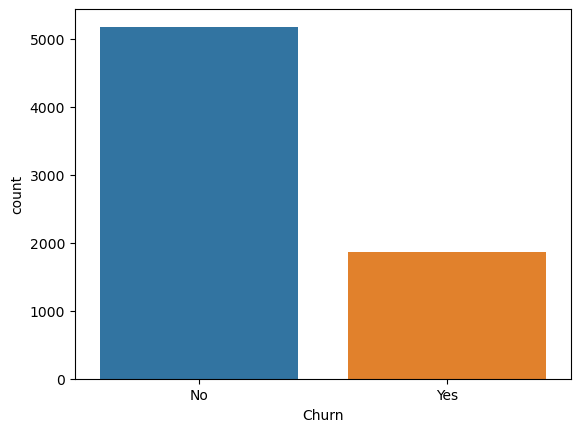

In [9]:
sns.countplot(data['Churn']);

AN IMBALANCED DATA SET

<AxesSubplot:xlabel='gender', ylabel='count'>

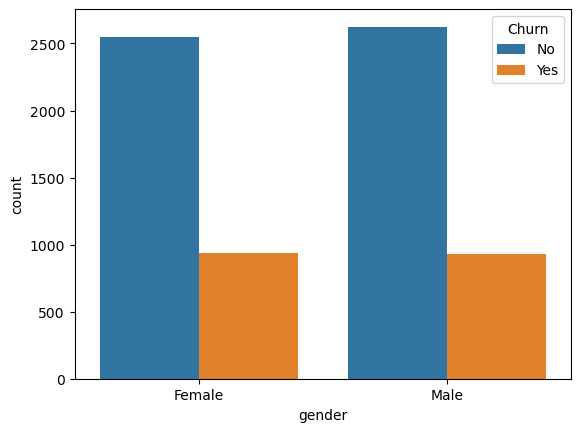

In [10]:
sns.countplot(x ='gender', hue='Churn', data=data)

THE CHURNING RATE OF BOTH MALE AND FEMALE SIMILAR 

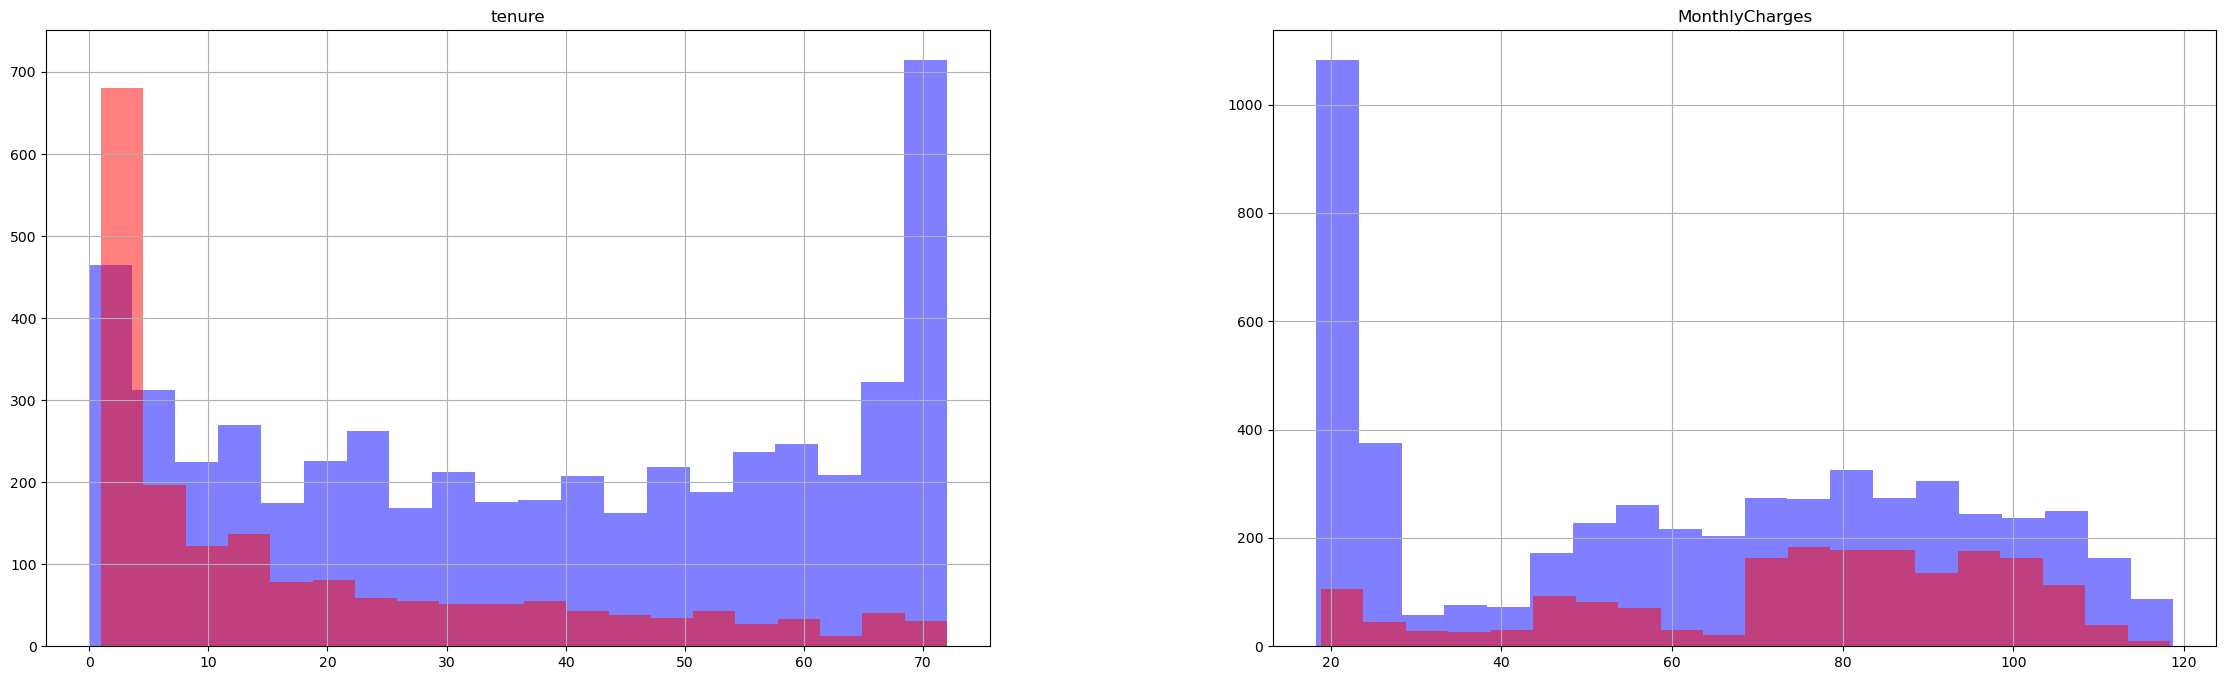

In [11]:
numericFeatures = ['tenure','MonthlyCharges']
fig,ax = plt.subplots(1,2, figsize=(28,8))
data[data.Churn == "No"][numericFeatures].hist(bins=20, color='blue', alpha=0.5, ax=ax)
data[data.Churn == "Yes"][numericFeatures].hist(bins=20, color='red', alpha=0.5, ax=ax);

In [12]:
data1 = data.drop('customerID', axis=1)

In [13]:
data1["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [14]:
data2 = data1.copy()

In [15]:
data2.replace({"Yes":1,"No":2,"No phone service":3},inplace=True)

In [16]:
data3 = data2.copy()

In [17]:
a = pd.get_dummies(data3["InternetService"])

In [18]:
data3["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
2              1526
Name: InternetService, dtype: int64

In [19]:
data4 = pd.concat([data3,a],axis=1)

In [20]:
data4.drop(["InternetService"],axis=1,inplace=True)

In [21]:
data5 = data4.copy()

In [22]:
data4["OnlineSecurity"].value_counts()

2                      3498
1                      2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [23]:
data5.replace({"No internet service":0},inplace=True)

In [24]:
data5["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [25]:
b = pd.get_dummies(data5["Contract"])

In [26]:
data6 = pd.concat([data5,b],axis=1)

In [27]:
data6.drop(["Contract"],axis=1,inplace=True)

In [28]:
data6["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [29]:
data7 = data6.copy()

In [30]:
c = pd.get_dummies(data6["PaymentMethod"])

In [31]:
data8 = pd.concat([data7,c],axis=1)

In [32]:
data8.drop(["PaymentMethod"],axis=1,inplace=True)

In [33]:
d = pd.get_dummies(data8["gender"])

In [34]:
data9 = pd.concat([data8,d],axis=1)

In [35]:
data9.drop(["gender"],axis=1,inplace=True)

In [36]:
data9.dtypes

SeniorCitizen                  int64
Partner                        int64
Dependents                     int64
tenure                         int64
PhoneService                   int64
MultipleLines                  int64
OnlineSecurity                 int64
OnlineBackup                   int64
DeviceProtection               int64
TechSupport                    int64
StreamingTV                    int64
StreamingMovies                int64
PaperlessBilling               int64
MonthlyCharges               float64
TotalCharges                  object
Churn                          int64
2                              uint8
DSL                            uint8
Fiber optic                    uint8
Month-to-month                 uint8
One year                       uint8
Two year                       uint8
Bank transfer (automatic)      uint8
Credit card (automatic)        uint8
Electronic check               uint8
Mailed check                   uint8
Female                         uint8
M

In [37]:
data9

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Fiber optic,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Female,Male
0,0,1,2,1,2,3,2,1,2,2,...,0,1,0,0,0,0,1,0,1,0
1,0,2,2,34,1,2,1,2,1,2,...,0,0,1,0,0,0,0,1,0,1
2,0,2,2,2,1,2,1,1,2,2,...,0,1,0,0,0,0,0,1,0,1
3,0,2,2,45,2,3,1,2,1,1,...,0,0,1,0,1,0,0,0,0,1
4,0,2,2,2,1,2,2,2,2,2,...,1,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,2,1,1,...,0,0,1,0,0,0,0,1,0,1
7039,0,1,1,72,1,1,2,1,1,2,...,1,0,1,0,0,1,0,0,1,0
7040,0,1,1,11,2,3,1,2,2,2,...,0,1,0,0,0,0,1,0,1,0
7041,1,1,2,4,1,1,2,2,2,2,...,1,1,0,0,0,0,0,1,0,1


In [38]:
for column in data9.columns:
  if data9[column].dtype == np.number:
    continue
  data9[column] = LabelEncoder().fit_transform(data9[column])

In [39]:
data9.columns

Index([            'SeniorCitizen',                   'Partner',
                      'Dependents',                    'tenure',
                    'PhoneService',             'MultipleLines',
                  'OnlineSecurity',              'OnlineBackup',
                'DeviceProtection',               'TechSupport',
                     'StreamingTV',           'StreamingMovies',
                'PaperlessBilling',            'MonthlyCharges',
                    'TotalCharges',                     'Churn',
                                 2,                       'DSL',
                     'Fiber optic',            'Month-to-month',
                        'One year',                  'Two year',
       'Bank transfer (automatic)',   'Credit card (automatic)',
                'Electronic check',              'Mailed check',
                          'Female',                      'Male'],
      dtype='object')

In [40]:
data9

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Fiber optic,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Female,Male
0,0,0,1,1,1,2,2,1,2,2,...,0,1,0,0,0,0,1,0,1,0
1,0,1,1,34,0,1,1,2,1,2,...,0,0,1,0,0,0,0,1,0,1
2,0,1,1,2,0,1,1,1,2,2,...,0,1,0,0,0,0,0,1,0,1
3,0,1,1,45,1,2,1,2,1,1,...,0,0,1,0,1,0,0,0,0,1
4,0,1,1,2,0,1,2,2,2,2,...,1,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,24,0,0,1,2,1,1,...,0,0,1,0,0,0,0,1,0,1
7039,0,0,0,72,0,0,2,1,1,2,...,1,0,1,0,0,1,0,0,1,0
7040,0,0,0,11,1,2,1,2,2,2,...,0,1,0,0,0,0,1,0,1,0
7041,1,0,1,4,0,0,2,2,2,2,...,1,1,0,0,0,0,0,1,0,1


In [41]:
data9.dtypes

SeniorCitizen                  int64
Partner                        int64
Dependents                     int64
tenure                         int64
PhoneService                   int64
MultipleLines                  int64
OnlineSecurity                 int64
OnlineBackup                   int64
DeviceProtection               int64
TechSupport                    int64
StreamingTV                    int64
StreamingMovies                int64
PaperlessBilling               int64
MonthlyCharges               float64
TotalCharges                   int32
Churn                          int64
2                              int64
DSL                            int64
Fiber optic                    int64
Month-to-month                 int64
One year                       int64
Two year                       int64
Bank transfer (automatic)      int64
Credit card (automatic)        int64
Electronic check               int64
Mailed check                   int64
Female                         int64
M

## TO STANDARDIZED THE DATA

In [42]:
x = data9.drop('Churn', axis=1)
y = data9['Churn']
x = StandardScaler().fit_transform(x)

## TO TRAIN AND TEST THE DATA

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

## MODEL USING LOGISTIC REGRESSION

In [44]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [45]:
predictions = model.predict(xtest)
print(predictions)

[0 1 1 ... 1 1 1]


In [46]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.68      0.58      0.63       373
           1       0.86      0.90      0.88      1036

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



THE PRECISION AND RECALL FOR CLASS ZERO IS LESS

In [47]:
pd.DataFrame(predictions,ytest)

,0
Churn,
0,0
1,1
1,1
0,0
1,1
...,...
1,1
1,1
1,1


In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(predictions,ytest)

array([[215, 100],
       [158, 936]], dtype=int64)

## USING NEURAL NETWORK

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [51]:
model = Sequential()
model.add(Dense(50,input_dim=27, activation='tanh'))
model.add(Dense(30, activation='tanh'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [52]:
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [53]:
model.fit(xtrain,ytrain, epochs=100)

Epoch 1/100
177/177 [==============================] - 1s 1ms/step - loss: 0.5452 - accuracy: 0.7368
Epoch 2/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4669 - accuracy: 0.7609
Epoch 3/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4452 - accuracy: 0.7820
Epoch 4/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4378 - accuracy: 0.7817
Epoch 5/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4341 - accuracy: 0.7861
Epoch 6/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4309 - accuracy: 0.7898
Epoch 7/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4289 - accuracy: 0.7945
Epoch 8/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.7925
Epoch 9/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4253 - accuracy: 0.7952
Epoch 10/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4234 - accura

In [54]:
score = model.evaluate(xtest,ytest)

45/45 [==============================] - 0s 657us/step - loss: 0.4412 - accuracy: 0.7899


In [55]:
predictions = model.predict(xtest)

45/45 [==============================] - 0s 826us/step


In [56]:
pred =pd.DataFrame(predictions>0.5)    

In [57]:
pred.replace({"False":1,"True":0},inplace=True)

In [58]:
confusion_matrix(pred,ytest)

array([[251, 174],
       [122, 862]], dtype=int64)

In [59]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.59      0.67      0.63       373
           1       0.88      0.83      0.85      1036

    accuracy                           0.79      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.80      0.79      0.79      1409



In [60]:
data9

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Fiber optic,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Female,Male
0,0,0,1,1,1,2,2,1,2,2,...,0,1,0,0,0,0,1,0,1,0
1,0,1,1,34,0,1,1,2,1,2,...,0,0,1,0,0,0,0,1,0,1
2,0,1,1,2,0,1,1,1,2,2,...,0,1,0,0,0,0,0,1,0,1
3,0,1,1,45,1,2,1,2,1,1,...,0,0,1,0,1,0,0,0,0,1
4,0,1,1,2,0,1,2,2,2,2,...,1,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,24,0,0,1,2,1,1,...,0,0,1,0,0,0,0,1,0,1
7039,0,0,0,72,0,0,2,1,1,2,...,1,0,1,0,0,1,0,0,1,0
7040,0,0,0,11,1,2,1,2,2,2,...,0,1,0,0,0,0,1,0,1,0
7041,1,0,1,4,0,0,2,2,2,2,...,1,1,0,0,0,0,0,1,0,1


In [61]:
data9.columns

Index([            'SeniorCitizen',                   'Partner',
                      'Dependents',                    'tenure',
                    'PhoneService',             'MultipleLines',
                  'OnlineSecurity',              'OnlineBackup',
                'DeviceProtection',               'TechSupport',
                     'StreamingTV',           'StreamingMovies',
                'PaperlessBilling',            'MonthlyCharges',
                    'TotalCharges',                     'Churn',
                                 2,                       'DSL',
                     'Fiber optic',            'Month-to-month',
                        'One year',                  'Two year',
       'Bank transfer (automatic)',   'Credit card (automatic)',
                'Electronic check',              'Mailed check',
                          'Female',                      'Male'],
      dtype='object')

In [62]:
data3.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [63]:
data9["Fiber optic"]

0       0
1       0
2       0
3       0
4       1
       ..
7038    0
7039    1
7040    0
7041    1
7042    1
Name: Fiber optic, Length: 7043, dtype: int64

In [64]:
data10 = data9.drop(["OnlineSecurity","DeviceProtection","Fiber optic"],axis=1)

## TO FIT AND TRANSFORM

In [67]:
from sklearn.preprocessing import minmax_scale

In [70]:
x = data10.drop('Churn', axis=1)
y = data10['Churn']
x = minmax_scale(x)

In [71]:
x

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.]])

## TO TRAIN AND TEST

In [72]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [73]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [74]:
predictions = model.predict(xtest)
print(predictions)

[0 1 1 ... 1 1 1]


In [75]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.68      0.58      0.63       373
           1       0.86      0.90      0.88      1036

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [76]:
confusion_matrix(predictions,ytest)

array([[217, 100],
       [156, 936]], dtype=int64)

## MODEL USING RANDOM FOREST

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [78]:
rfr = RandomForestClassifier()

In [79]:
rfr = RandomForestClassifier(max_depth =8, min_samples_leaf= 7, min_samples_split= 8, n_estimators= 100)

In [80]:
rfr = rfr.fit(xtrain, ytrain)

In [81]:
y_train_preds = rfr.predict(xtrain)
y_train_preds

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [82]:
y_test_preds = rfr.predict(xtest)

In [83]:
confusion_matrix(ytest,y_test_preds)

array([[184, 189],
       [ 79, 957]], dtype=int64)

In [84]:
print(classification_report(ytest, y_test_preds))

              precision    recall  f1-score   support

           0       0.70      0.49      0.58       373
           1       0.84      0.92      0.88      1036

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [85]:
from sklearn.ensemble import AdaBoostClassifier

In [86]:
ad = AdaBoostClassifier(n_estimators=1000,learning_rate=0.02)

In [87]:
ad = ad.fit(xtrain, ytrain)

In [88]:
y_train_preds = ad.predict(xtrain)
y_train_preds

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [89]:
y_test_preds = ad.predict(xtest)

In [90]:
confusion_matrix(ytest,y_test_preds)

array([[193, 180],
       [ 90, 946]], dtype=int64)

In [91]:
print(classification_report(ytest, y_test_preds))

              precision    recall  f1-score   support

           0       0.68      0.52      0.59       373
           1       0.84      0.91      0.88      1036

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [221]:
pip install xgboost


     -------------------------------------- 70.9/70.9 MB 552.3 kB/s eta 0:00:00


## MODEL USING XGBOOST

In [92]:
from xgboost import XGBClassifier

In [93]:
xg = XGBClassifier()

In [94]:
xg = xg.fit(xtrain,ytrain)

In [95]:
y_train_preds = xg.predict(xtrain)
y_train_preds

array([1, 1, 0, ..., 1, 0, 1])

In [96]:
y_test_preds = xg.predict(xtest)

In [97]:
confusion_matrix(ytest,y_test_preds)

array([[199, 174],
       [107, 929]], dtype=int64)

In [98]:
print(classification_report(ytest, y_test_preds))

              precision    recall  f1-score   support

           0       0.65      0.53      0.59       373
           1       0.84      0.90      0.87      1036

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

